**# HUMAN SCREAM DETECTION**

In [1]:
# Importing the libraries
import numpy as np
import librosa
import pywhatkit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.utils import to_categorical
import sounddevice as sd
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.io.wavfile import write
from IPython.display import display, Audio

In [2]:
# Function to extract features from audio files using librosa
def extract_features(file_path, mfcc=True, chroma=True, mel=True):
    y, sr = librosa.load(file_path, mono=True)
    features = []
    if mfcc:
        mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13), axis=1)
        features.extend(mfccs)
    if chroma:
        chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr), axis=1)
        features.extend(chroma)
    if mel:
        mel = np.mean(librosa.feature.melspectrogram(y=y, sr=sr), axis=1)
        features.extend(mel)
    return features


In [3]:
# Example to train the model, evaluate, and test with recorded audio
scream_folder = "Assets/positive"
non_scream_folder = "Assets/negative"

In [4]:
# Function to load and preprocess the dataset
def load_and_preprocess_data(scream_folder, non_scream_folder):
    features = []
    labels = []

    # Load scream data
    import os
    for filename in os.listdir(scream_folder):
        path = os.path.join(scream_folder, filename)
        feature = extract_features(path)
        features.append(feature)
        labels.append(1)  # Use integer labels, e.g., 1 for scream

    # Load non-scream data
    for filename in os.listdir(non_scream_folder):
        path = os.path.join(non_scream_folder, filename)
        feature = extract_features(path)
        features.append(feature)
        labels.append(0)  # Use integer labels, e.g., 0 for non-scream

    X = np.array(features)
    y = np.array(labels)

    # Encode labels using LabelEncoder
    le = LabelEncoder()
    y = le.fit_transform(y)

    # Convert to one-hot encoding
    y = to_categorical(y)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test, le

In [5]:
# Define the model
def create_model(input_shape):
    model = models.Sequential()
    model.add(layers.Dense(256, activation='relu', input_shape=(input_shape,)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(2, activation='softmax'))  # 2 output neurons for binary classification (scream or non-scream)

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [6]:
# Evaluate the model
def evaluate_model(model, X_test, y_test):
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f'Test loss: {loss:.4f}')
    print(f'Test accuracy: {accuracy:.4f}')

Epoch 1/150
4/4 [==============================] - 1s 87ms/step - loss: 17.7120 - accuracy: 0.5982 - val_loss: 4.3481 - val_accuracy: 0.8276
Epoch 2/150
4/4 [==============================] - 0s 13ms/step - loss: 15.8465 - accuracy: 0.5982 - val_loss: 2.5784 - val_accuracy: 0.8621
Epoch 3/150
4/4 [==============================] - 0s 14ms/step - loss: 11.6965 - accuracy: 0.6429 - val_loss: 1.2320 - val_accuracy: 0.8966
Epoch 4/150
4/4 [==============================] - 0s 13ms/step - loss: 9.6120 - accuracy: 0.6875 - val_loss: 1.1647 - val_accuracy: 0.8966
Epoch 5/150
4/4 [==============================] - 0s 13ms/step - loss: 7.3419 - accuracy: 0.7232 - val_loss: 0.8924 - val_accuracy: 0.8966
Epoch 6/150
4/4 [==============================] - 0s 12ms/step - loss: 5.6897 - accuracy: 0.7589 - val_loss: 0.6459 - val_accuracy: 0.9655
Epoch 7/150
4/4 [==============================] - 0s 13ms/step - loss: 6.4669 - accuracy: 0.7500 - val_loss: 0.6262 - val_accuracy: 0.9655
Epoch 8/150
4/4 [

Epoch 59/150
4/4 [==============================] - 0s 13ms/step - loss: 0.2744 - accuracy: 0.9732 - val_loss: 1.2124 - val_accuracy: 0.9655
Epoch 60/150
4/4 [==============================] - 0s 14ms/step - loss: 0.2191 - accuracy: 0.9732 - val_loss: 1.2207 - val_accuracy: 0.9655
Epoch 61/150
4/4 [==============================] - 0s 16ms/step - loss: 0.0226 - accuracy: 0.9911 - val_loss: 1.2504 - val_accuracy: 0.9655
Epoch 62/150
4/4 [==============================] - 0s 14ms/step - loss: 0.4682 - accuracy: 0.9643 - val_loss: 1.1891 - val_accuracy: 0.9655
Epoch 63/150
4/4 [==============================] - 0s 15ms/step - loss: 0.0986 - accuracy: 0.9821 - val_loss: 1.1308 - val_accuracy: 0.9655
Epoch 64/150
4/4 [==============================] - 0s 15ms/step - loss: 0.4997 - accuracy: 0.9732 - val_loss: 1.0842 - val_accuracy: 0.9655
Epoch 65/150
4/4 [==============================] - 0s 15ms/step - loss: 0.5436 - accuracy: 0.9464 - val_loss: 0.9513 - val_accuracy: 0.9655
Epoch 66/150


4/4 [==============================] - 0s 13ms/step - loss: 0.0585 - accuracy: 0.9911 - val_loss: 1.1657 - val_accuracy: 0.9655
Epoch 117/150
4/4 [==============================] - 0s 14ms/step - loss: 1.1183e-05 - accuracy: 1.0000 - val_loss: 1.1454 - val_accuracy: 0.9655
Epoch 118/150
4/4 [==============================] - 0s 13ms/step - loss: 1.0666e-04 - accuracy: 1.0000 - val_loss: 1.1321 - val_accuracy: 0.9655
Epoch 119/150
4/4 [==============================] - 0s 14ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 1.1302 - val_accuracy: 0.9655
Epoch 120/150
4/4 [==============================] - 0s 13ms/step - loss: 0.1913 - accuracy: 0.9821 - val_loss: 1.1706 - val_accuracy: 0.9655
Epoch 121/150
4/4 [==============================] - 0s 14ms/step - loss: 1.2423e-04 - accuracy: 1.0000 - val_loss: 1.2195 - val_accuracy: 0.9655
Epoch 122/150
4/4 [==============================] - 0s 13ms/step - loss: 0.0325 - accuracy: 0.9911 - val_loss: 1.4214 - val_accuracy: 0.9655
Epoch 12

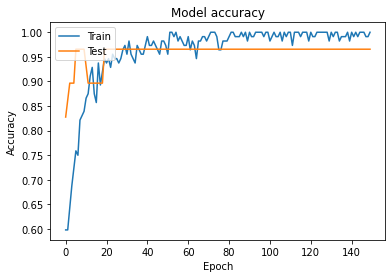

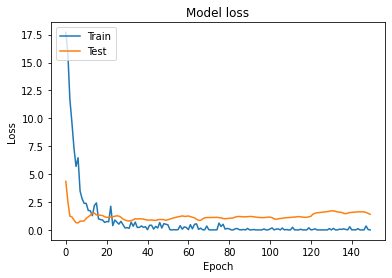

1/1 [==============================] - 0s 25ms/step - loss: 1.4058 - accuracy: 0.9655
Test loss: 1.4058
Test accuracy: 0.9655


In [7]:
# Training the model
def train_model(X_train, y_train, X_test, y_test, epochs=150, batch_size=32):
    input_shape = X_train.shape[1]
    model = create_model(input_shape)

    # Callbacks for early stopping and model checkpoint
    # early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(X_test, y_test))
    # history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
    #                     validation_data=(X_test, y_test), callbacks=[early_stopping])
    
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    return model, history
X_train, X_test, y_train, y_test, label_encoder = load_and_preprocess_data(scream_folder, non_scream_folder)
model, history = train_model(X_train, y_train, X_test, y_test)
evaluate_model(model, X_test, y_test)


In [8]:
# Function to predict whether an audio file contains a scream or not
def predict_audio(file_path, model, label_encoder):
    
    feature = extract_features(file_path)
    feature = np.array(feature).reshape(1, -1)
    prediction = model.predict(feature)
    display(Audio(file_path))

    if len(prediction) == 0:
        return "Unknown"

    predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])
    return predicted_label[0]

In [9]:
# Example to test an audio file

# Test : 1

audio_file_to_test = "Assets/testing/n1.wav"
predicted_label = predict_audio(audio_file_to_test, model, label_encoder)
print(f"The predicted label for {audio_file_to_test} is: {predicted_label}")
print()

if predicted_label == 1:
  print("Nearby Officer is alerted")
else:
  print("No alert required")

The predicted label for Assets/testing/n1.wav is: 0

No alert required


In [10]:
# Example to test an audio file

# Test : 2

audio_file_to_test = "Assets/testing/p1.wav"
predicted_label = predict_audio(audio_file_to_test, model, label_encoder)
print(f"The predicted label for {audio_file_to_test} is: {predicted_label}")
print()

if predicted_label == 1:
  print("Nearby Officer is alerted")
else:
  print("No alert required")

The predicted label for Assets/testing/p1.wav is: 1

Nearby Officer is alerted


In [11]:
# Function to record audio and save it to testing
def record_audio(output_file, duration=10, sample_rate=44100):
    print(f"Recording... Please speak for {duration} seconds.")

    # Record audio
    audio_data = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1, dtype=np.int16)
    sd.wait()

    # Save the recorded audio to a file
    write(output_file, sample_rate, audio_data)

    print(f"Recording saved to {output_file}.")

In [12]:
# Example to record audio and test the prediction
output_file_path = "Assets/testing/recorded_audio.wav"
record_audio(output_file_path)

# Predict the label for the recorded audio
predicted_label = predict_audio(output_file_path, model, label_encoder)
print(f"The predicted label for the recorded audio is: {predicted_label}")
print()



if predicted_label == 1:
    print("Nearby Officer is alerted")
else:
    print("No alert required")

Recording... Please speak for 10 seconds.
Recording saved to Assets/testing/recorded_audio.wav.


The predicted label for the recorded audio is: 0

No alert required


In [14]:
import pywhatkit as kit
import time

# Define the phone number and message
phone_number = "+918208655170"
message = "I am a Linux World Student!, Our motto to Make India Future Ready"

# Wait for 10 seconds
time.sleep(10)

# Send the message
kit.sendwhatmsg_instantly(phone_number, message)

print("Message sent!")


Message sent!
